In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [64]:
# Define the XOR inputs and outputs
x = np.array([[0, 0],
            [0, 1],
            [1, 0],
            [1, 1]])

y = np.array([[0], 
            [1], 
            [1], 
            [0]])

In [65]:
# Initialize the weights and biases randomly

n_x = 2
n_h = 2
n_y = 1
np.random.seed(10)
w1 = np.random.randn(n_x, n_h)
w2 = np.random.randn(n_h, n_y)
b1 = np.zeros((1, n_h))
b2 = np.zeros((1, n_y))


In [66]:
# Training parameters
#  given in the questions
learning_rate = 0.1
epochs_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
loss_history = []

In [67]:
# just for confirmation
print("x shape: ",x.shape)
print("y shape: ",y.shape)
print("w1 shape: ",w1.shape)
print("w2 shape: ",w2.shape)
print("b1 shape: ",b1.shape)
print("b2 shape: ",b2.shape)

x shape:  (4, 2)
y shape:  (4, 1)
w1 shape:  (2, 2)
w2 shape:  (2, 1)
b1 shape:  (1, 2)
b2 shape:  (1, 1)


In [68]:
# number of iterations
iterations = 10000


# Training the neural network
for epoch in range(1,iterations):
    # Forward Propagation
    z1 = np.dot(x, w1) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    
    # Calculate the loss (Mean Squared Error)
    loss = np.mean((y - a2) ** 2)
    if epoch in epochs_list:
        loss_history.append(loss)

    error = y - a2
    d_error = error * sigmoid_derivative(a2)
    
    errorHidden = np.dot(d_error, w2.T)
    d_errorHidden = errorHidden * sigmoid_derivative(a1)
    
    # Update weights and biases
    w2 += np.dot(a1.T, d_error) * learning_rate
    b2 += np.sum(d_error, axis=0, keepdims=True) * learning_rate
    
    w1 += np.dot(x.T, d_errorHidden) * learning_rate
    b1 += np.sum(d_errorHidden, axis=0, keepdims=True) * learning_rate

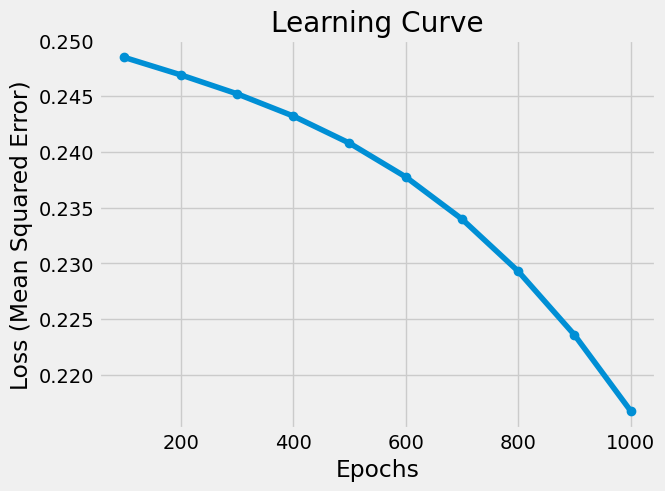

array([[0.04476547],
       [0.94890649],
       [0.95883882],
       [0.03939122]])

In [69]:
plt.style.use("fivethirtyeight")
# Plot the learning curve
plt.plot(epochs_list, loss_history, marker='o')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.grid(True)
plt.show()

# Print the final predicted outputs
a2